<h1>CUSTOMER RELATIONSHIP MANAGEMENT</h1>


<h3>Purpose:</h3>

The aim of this Customer Relationship Management (CRM) project is to establish a robust system for effectively managing and enhancing customer interactions. Utilizing the MySQL database schema provided, the project endeavors to centralize customer data management, streamline order processing, and analyze feedback. The primary objectives include storing and organizing comprehensive customer information, facilitating seamless communication channels, and ensuring efficient order tracking and inventory management. Additionally, the system aims to monitor customer feedback and ratings to identify areas for improvement, personalize marketing strategies, and ultimately foster stronger customer relationships. By implementing this CRM solution, businesses can optimize their customer interactions, drive satisfaction and loyalty, and ultimately achieve sustainable growth in a competitive market landscape.

<h3>Step 0: Installing Dependencies</h3>

In [3]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Install necessary libraries for connecting to MySQL database
!pip install SQLAlchemy mysql-connector-python

<h3>Step 1: Importing the necessary Packages</h3>

In [3]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

<h3>Step 3:DATABASE CONNECTION TO mySQL</h3>

In [ ]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='admin',
host='localhost',
database='crm_db'
)

<h3>Step 4:Data View</h3>

In [19]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL connection details
username = 'root'
password = 'admin'
host = 'localhost'
database = 'crm_db'

# Create SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{username}:{password}@{host}/{database}')

# Read the tables into DataFrames
customers = pd.read_sql('SELECT * FROM Customers', con=engine)
products = pd.read_sql('SELECT * FROM Products', con=engine)
employees = pd.read_sql('SELECT * FROM Employees', con=engine)
orders = pd.read_sql('SELECT * FROM Orders', con=engine)
customer_feedback = pd.read_sql('SELECT * FROM CustomerFeedback', con=engine)

# Printing the first 5 records from each table
print("Customers Data:")
print(customers.head())

print("\nProducts Data:")
print(products.head())

print("\nEmployees Data:")
print(employees.head())

print("\nOrders Data:")
print(orders.head())

print("\nCustomerFeedback Data:")
print(customer_feedback.head())


Customers Data:
   CustomerID FirstName LastName                   Email       Phone  \
0         101      Mira    Singh    mira.singh@gmail.com  8609471781   
1         102      Aria   Kapoor   aria.kapoor@gmail.com  8811446476   
2         103     Madan   Saxena  madan.saxena@gmail.com  7231221036   
3         104    Ananya    Sinha  ananya.sinha@gmail.com  8309272274   
4         105      Isha    Kumar    isha.kumar@gmail.com  7189265872   

              Address     City          State ZipCode Country  \
0   44, Mumbai Street   Mumbai    Maharashtra  599526   India   
1  68, Lucknow Street  Lucknow  Uttar Pradesh  631288   India   
2   5, Lucknow Street  Lucknow  Uttar Pradesh  496829   India   
3  65, Kolkata Street  Kolkata    West Bengal  745696   India   
4  77, Kolkata Street  Kolkata    West Bengal  396038   India   

            CreatedAt  
0 2024-06-03 21:26:03  
1 2024-06-03 21:26:03  
2 2024-06-03 21:26:03  
3 2024-06-03 21:26:03  
4 2024-06-03 21:26:03  

Products Data:


<h3>Step 4:Data Cleaning</h3>

In [20]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("Customers\n----------")
print(customers.isnull().sum())
print("\nProducts\n----------")
print(products.isnull().sum())
print("\nEmployees\n----------")
print(employees.isnull().sum())
print("\nOrders\n----------")
print(orders.isnull().sum())
print("\nCustomerFeedback\n----------")
print(customer_feedback.isnull().sum())


Customers
----------
CustomerID    0
FirstName     0
LastName      0
Email         0
Phone         0
Address       0
City          0
State         0
ZipCode       0
Country       0
CreatedAt     0
dtype: int64

Products
----------
ProductID      0
ProductName    0
Description    0
Price          0
Stock          0
CreatedAt      0
dtype: int64

Employees
----------
EmployeeID    0
FirstName     0
LastName      0
Email         0
Phone         0
Position      0
Department    0
HireDate      0
CreatedAt     0
dtype: int64

Orders
----------
OrderID        0
CustomerID     0
OrderDate      0
TotalAmount    0
Status         0
dtype: int64

CustomerFeedback
----------
FeedbackID    0
CustomerID    0
OrderID       0
Rating        0
Comments      0
CreatedAt     0
dtype: int64


<h2>Step 5: Query Execution:</h2>

In [22]:
import mysql.connector
import pandas as pd

# MySQL connection details
username = 'root'
password = 'admin'
host = 'localhost'
database = 'crm_db'

# Establish connection to MySQL database
connection = mysql.connector.connect(
    user=username,
    password=password,
    host=host,
    database=database
)

# Create cursor object
cursor = connection.cursor()

# Execute SQL query to join data from multiple tables (Customers, Orders, CustomerFeedback)
cursor.execute('''
    SELECT c.CustomerID, c.FirstName, c.LastName, o.OrderID, cf.FeedbackID
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
    LEFT JOIN CustomerFeedback cf ON c.CustomerID = cf.CustomerID
''')

# Fetch the data and store it into a Pandas DataFrame
joined_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object (This line seems redundant)
joined_data = pd.DataFrame(joined_data)

# Printing the first few records of the joined data
print(joined_data.head())

# Close cursor and connection
cursor.close()
connection.close()


   CustomerID FirstName LastName  OrderID  FeedbackID
0         101      Mira    Singh     87.0         2.0
1         102      Aria   Kapoor     38.0        17.0
2         102      Aria   Kapoor     38.0        39.0
3         102      Aria   Kapoor     38.0        69.0
4         102      Aria   Kapoor     38.0        72.0


In [29]:
import mysql.connector

# Establish a connection to your MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="admin",
    database="crm_db"
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Execute the SQL query
cursor.execute("SELECT * FROM Orders WHERE Status = 'Shipped';")

# Fetch all rows from the result
confirmed_orders = cursor.fetchall()

# Print the results
for order in confirmed_orders:
    print(order)

# Close the cursor and connection
cursor.close()
connection.close()


(4, 153, datetime.datetime(2024, 3, 21, 10, 40, 41), Decimal('261.53'), 'Shipped')
(5, 176, datetime.datetime(2024, 1, 24, 10, 40, 41), Decimal('782.01'), 'Shipped')
(8, 129, datetime.datetime(2023, 10, 10, 10, 40, 41), Decimal('254.12'), 'Shipped')
(12, 162, datetime.datetime(2023, 7, 21, 10, 40, 41), Decimal('400.70'), 'Shipped')
(21, 162, datetime.datetime(2024, 5, 3, 10, 40, 41), Decimal('269.48'), 'Shipped')
(28, 120, datetime.datetime(2024, 2, 5, 10, 40, 41), Decimal('908.75'), 'Shipped')
(30, 190, datetime.datetime(2023, 12, 6, 10, 40, 41), Decimal('521.29'), 'Shipped')
(40, 156, datetime.datetime(2023, 7, 24, 10, 40, 41), Decimal('69.64'), 'Shipped')
(42, 162, datetime.datetime(2023, 12, 10, 10, 40, 41), Decimal('923.56'), 'Shipped')
(49, 156, datetime.datetime(2024, 4, 17, 10, 40, 41), Decimal('789.89'), 'Shipped')
(60, 158, datetime.datetime(2024, 1, 17, 10, 40, 41), Decimal('974.84'), 'Shipped')
(62, 159, datetime.datetime(2024, 3, 6, 10, 40, 41), Decimal('834.68'), 'Shipped

In [2]:
import mysql.connector

# Connect to the crm_db database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="admin",
    database="crm_db"
)

# Define the SQL query
sql = """
SELECT c.FirstName, c.LastName, o.OrderID, p.ProductName, cf.Rating, cf.Comments
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
INNER JOIN CustomerFeedback cf ON o.OrderID = cf.OrderID
INNER JOIN Products p ON cf.OrderID = p.ProductID;
"""

# Create a cursor object
cursor = db.cursor()

# Execute the query
cursor.execute(sql)

# Fetch the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(f"Customer Name: {row[0]} {row[1]}")
    print(f"Order ID: {row[2]}")
    print(f"Product: {row[3]}")
    print(f"Rating: {row[4]}")
    print(f"Comments: {row[5]}")
    print("---")

# Close the connection
db.close()


Customer Name: Mira Singh
Order ID: 87
Product: Tablet
Rating: 3
Comments: Average experience.
---
Customer Name: Aria Kapoor
Order ID: 38
Product: Smartphone
Rating: 5
Comments: Terrible service, will not buy again.
---
Customer Name: Aria Kapoor
Order ID: 83
Product: Tablet
Rating: 4
Comments: Terrible service, will not buy again.
---
Customer Name: Aria Kapoor
Order ID: 83
Product: Tablet
Rating: 1
Comments: Terrible service, will not buy again.
---
Customer Name: Aria Kapoor
Order ID: 83
Product: Tablet
Rating: 2
Comments: Excellent service!
---
Customer Name: Aria Kapoor
Order ID: 83
Product: Tablet
Rating: 3
Comments: Average experience.
---
Customer Name: Ananya Sinha
Order ID: 73
Product: Smartphone
Rating: 5
Comments: Average experience.
---
Customer Name: Ananya Sinha
Order ID: 73
Product: Smartphone
Rating: 1
Comments: Excellent service!
---
Customer Name: Isha Kumar
Order ID: 23
Product: Camera
Rating: 5
Comments: Terrible service, will not buy again.
---
Customer Name: Ish

In [3]:
import mysql.connector

# Replace with your actual username and password
username = "your_mysql_username"
password = "your_mysql_password"

# Connect to the crm_db database
try:
    db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="admin",
        database="crm_db"
    )
except mysql.connector.Error as err:
    print("Error connecting to database:", err)
    exit()

# Define the corrected SQL query
sql = """
SELECT p.ProductName, COUNT(cf.OrderID) AS TotalFeedback
FROM Products p
INNER JOIN CustomerFeedback cf ON p.ProductID = cf.OrderID  -- Corrected alias
GROUP BY p.ProductName
ORDER BY TotalFeedback DESC
LIMIT 3;
"""

# Create a cursor object
cursor = db.cursor()

# Execute the query
cursor.execute(sql)

# Fetch the results
results = cursor.fetchall()

# Print the results
print("Top 3 Most Popular Products:")
for row in results:
    print(f"- {row[0]} (Total Feedback: {row[1]})")

# Close the connection
db.close()


Top 3 Most Popular Products:
- Tablet (Total Feedback: 22)
- Smartwatch (Total Feedback: 20)
- Camera (Total Feedback: 17)


<h2>Step 6: DATA VISUALIZATION</h2>

C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_18172\1500125685.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Add legend for bars if labels are set


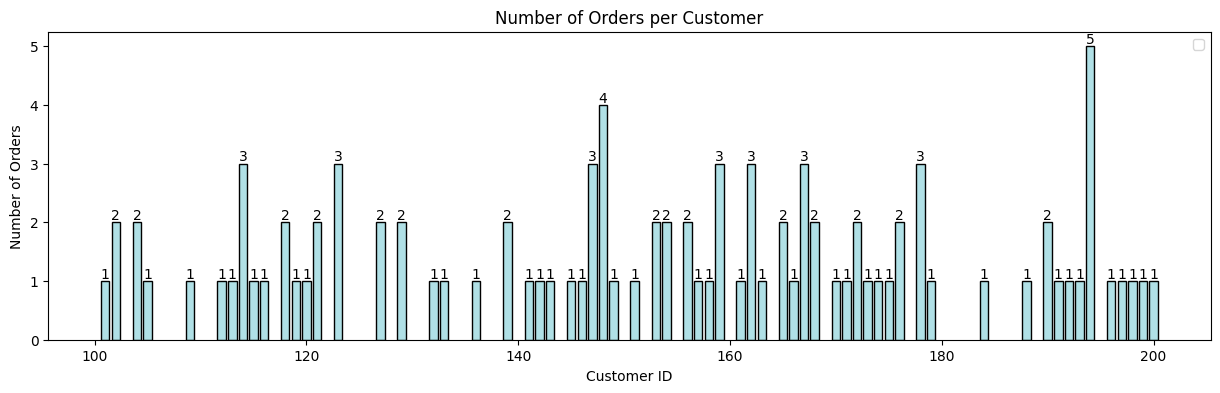

In [20]:
# Set the figure size
plt.figure(figsize=(15, 4))

# Plot the data using a bar chart
bars = plt.bar(customer_ids, order_counts, color='powderblue', width=0.8, edgecolor='black')

# Set the title, labels, and font sizes
plt.title('Number of Orders per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(fontsize=10)  # Set font size for x-axis labels
plt.yticks(fontsize=10)  # Set font size for y-axis labels

# Create a list of labels with formatted order counts
labels = [str(int(bar.get_height())) for bar in bars]

# Set bar labels using plt.bar_label (assuming labels are strings)
plt.bar_label(bars, labels)  # Sets labels and automatically positions them

# Display the plot
plt.legend()  # Add legend for bars if labels are set
plt.show()


C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_13228\1164182800.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_data = pd.read_sql_query(query, connection)


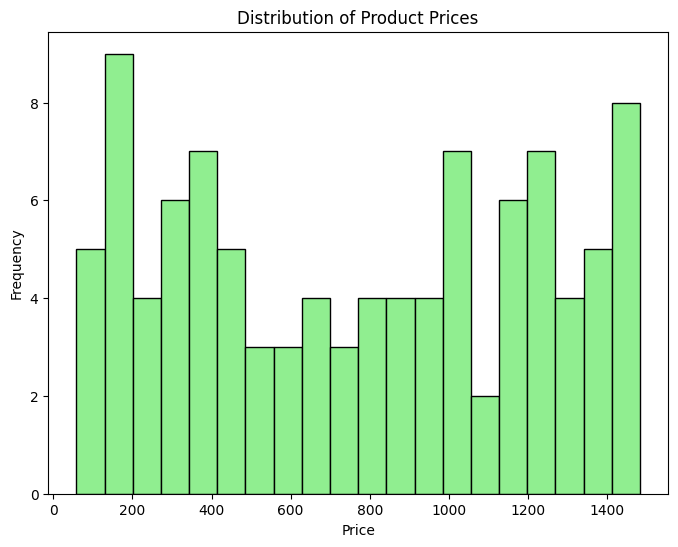

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'crm_db'
}

# Connect to the database
connection = mysql.connector.connect(**db_config)

# SQL query to get the prices of all products
query = "SELECT Price FROM Products"

# Load data into a DataFrame
products_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Extract the prices into a list
prices = products_data['Price'].tolist()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(prices, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


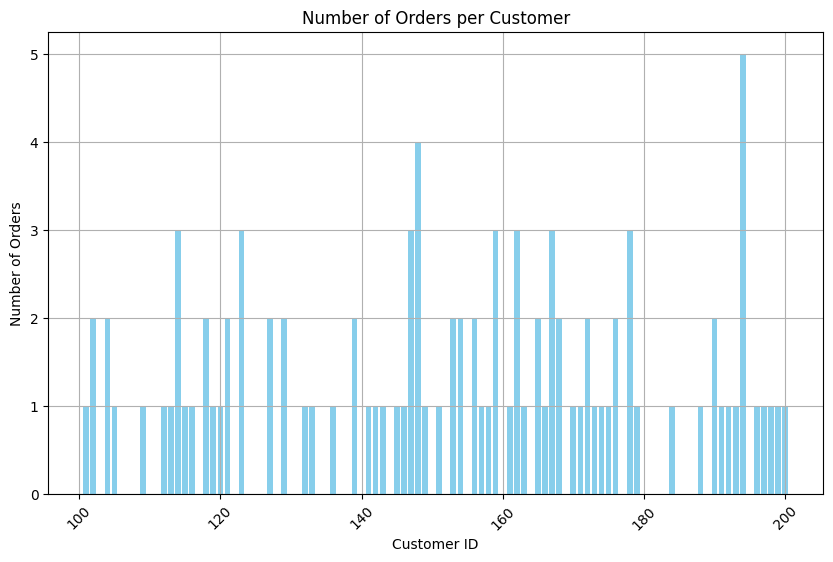

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
db_config = {
    'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'crm_db'
}
# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch data from the Orders table
query = "SELECT CustomerID, COUNT(*) AS OrderCount FROM Orders GROUP BY CustomerID"

# Execute the query and fetch the results
cursor = connection.cursor()
cursor.execute(query)
orders_data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Convert the fetched data into a DataFrame
orders_df = pd.DataFrame(orders_data, columns=['CustomerID', 'OrderCount'])

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(orders_df['CustomerID'], orders_df['OrderCount'], color='skyblue')
plt.title('Number of Orders per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_17500\3321699143.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_data = pd.read_sql_query(query, connection)


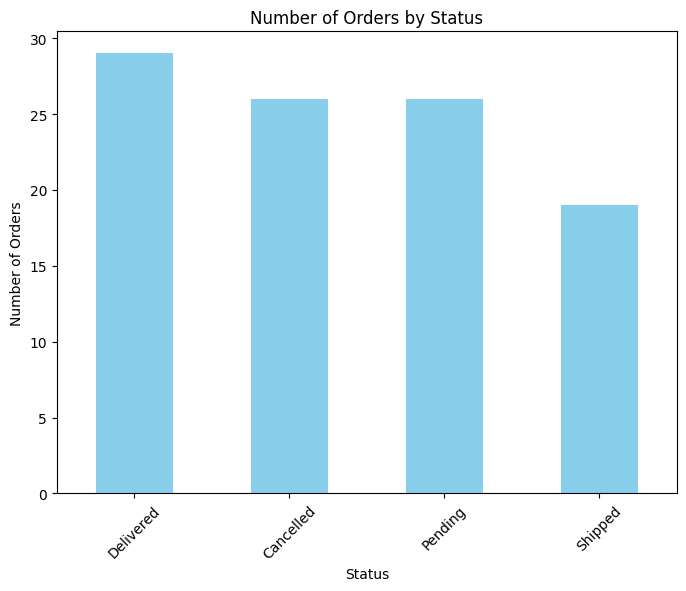

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Define your database connection details
db_config = {
    'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'crm_db'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch data from the Orders table
query = "SELECT Status FROM Orders"

# Execute the query and fetch the results into a DataFrame
orders_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Count the occurrences of each status
status_counts = orders_data['Status'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_17128\4185273232.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_data = pd.read_sql_query(query, connection)


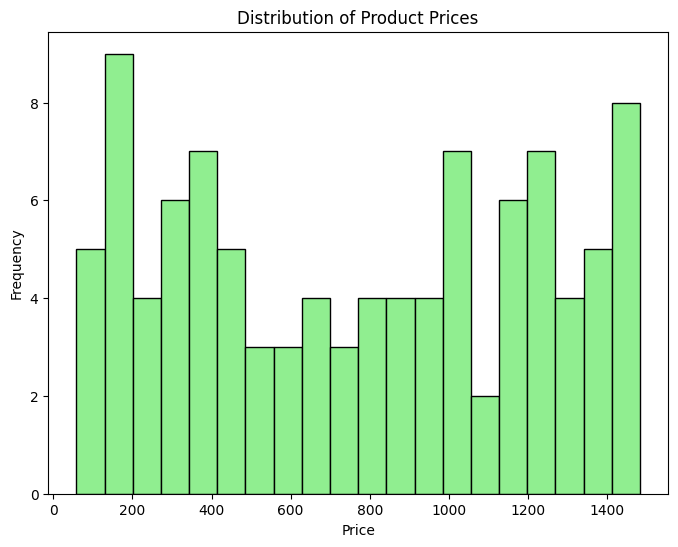

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Define your database connection details
db_config = {
    'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'crm_db'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch product prices from the Products table
query = "SELECT Price FROM Products"

# Execute the query and fetch the results into a DataFrame
products_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Plot a histogram of product prices
plt.figure(figsize=(8, 6))
plt.hist(products_data['Price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_17128\3305897360.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders_data = pd.read_sql_query(query, connection)


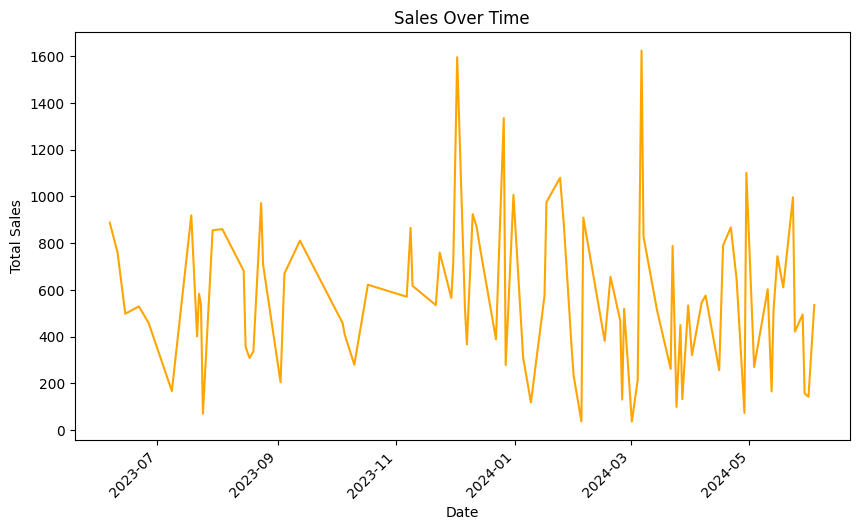

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Define your database connection details
db_config = {
    import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Define your database connection details
db_config = {
    'user': 'your_username',
    'password': 'your_password',
    'host': 'your_host',
    'database': 'crm_db'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch product prices and stock levels from the Products table
query = "SELECT Price, Stock FROM Products"

# Execute the query and fetch the results into a DataFrame
products_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Plot a scatter plot of product prices and stock levels
plt.figure(figsize=(8, 6))
plt.scatter(products_data['Price'], products_data['Stock'], color='red', alpha=0.5)
plt.title('Relationship between Price and Stock')
plt.xlabel('Price')
plt.ylabel('Stock')
plt.show()

}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch order date and total amount from the Orders table
query = "SELECT OrderDate, TotalAmount FROM Orders"

# Execute the query and fetch the results into a DataFrame
orders_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Convert 'OrderDate' column to datetime type
orders_data['OrderDate'] = pd.to_datetime(orders_data['OrderDate'])

# Group orders by OrderDate and calculate total sales
sales_over_time = orders_data.groupby('OrderDate')['TotalAmount'].sum()

# Plot a line chart
plt.figure(figsize=(10, 6))
sales_over_time.plot(kind='line', color='orange')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_17128\726303678.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  products_data = pd.read_sql_query(query, connection)


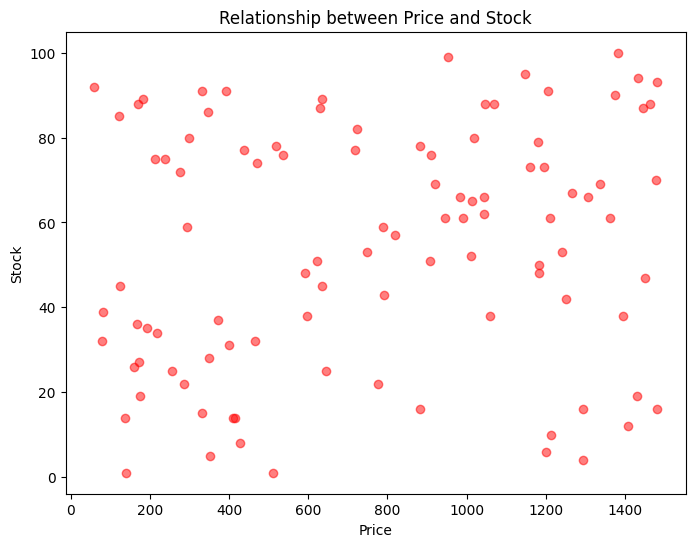

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Define your database connection details
db_config = {
     'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'crm_db'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch product prices and stock levels from the Products table
query = "SELECT Price, Stock FROM Products"

# Execute the query and fetch the results into a DataFrame
products_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Plot a scatter plot of product prices and stock levels
plt.figure(figsize=(8, 6))
plt.scatter(products_data['Price'], products_data['Stock'], color='red', alpha=0.5)
plt.title('Relationship between Price and Stock')
plt.xlabel('Price')
plt.ylabel('Stock')
plt.show()


C:\Users\Abinaya m\AppData\Local\Temp\ipykernel_17128\1838959640.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_feedback_data = pd.read_sql_query(query, connection)


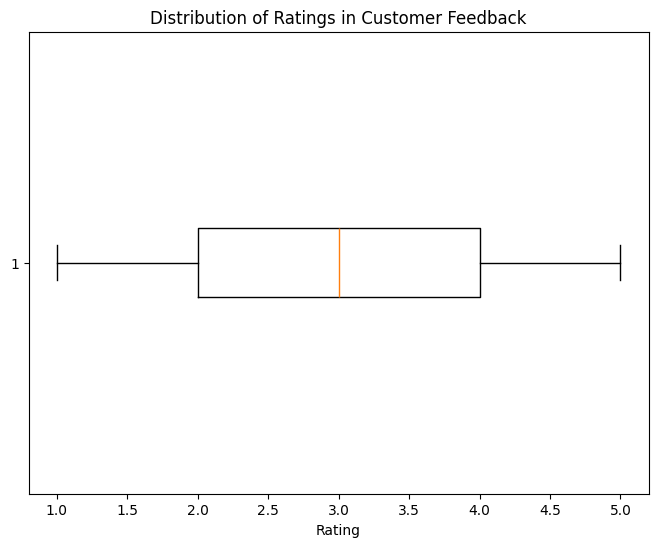

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Define your database connection details
db_config = {
    'user': 'root',
    'password': 'admin',
    'host': 'localhost',
    'database': 'crm_db'
}

# Establish a connection to the database
connection = mysql.connector.connect(**db_config)

# SQL query to fetch customer ratings from the CustomerFeedback table
query = "SELECT Rating FROM CustomerFeedback"

# Execute the query and fetch the results into a DataFrame
customer_feedback_data = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Plot a box plot of customer ratings
plt.figure(figsize=(8, 6))
plt.boxplot(customer_feedback_data['Rating'], vert=False)
plt.title('Distribution of Ratings in Customer Feedback')
plt.xlabel('Rating')
plt.show()
